In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [31]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [32]:
#!pip list

# Importing data

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
df = pd.read_csv('vehicle_price(2020).csv', delimiter=',')

In [35]:
df

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006,other,5350,220,diesel,2.0,manual
1,renault,master,2017,other,17000,211,diesel,2.3,manual
2,opel,vivaro,2015,other,15200,157,diesel,1.6,manual
3,ford,transit,2000,other,4999,300,diesel,2.4,manual
4,mercedes-benz,sprinter,2010,other,20700,682,diesel,3.0,automatic
...,...,...,...,...,...,...,...,...,...
215,ford,transit,2016,other,13999,170,diesel,2.2,manual
216,volkswagen,crafter,2010,other,11300,247,diesel,2.5,manual
217,mercedes-benz,210,2000,other,5000,250,diesel,2.9,manual
218,mercedes-benz,sprinter,2001,other,7500,370,diesel,2.2,automatic


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         220 non-null    object 
 1   model         220 non-null    object 
 2   year          220 non-null    int64  
 3   body          220 non-null    object 
 4   price         220 non-null    int64  
 5   car_mileage   220 non-null    int64  
 6   fuel          200 non-null    object 
 7   power         200 non-null    float64
 8   transmission  220 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.6+ KB


В переменных fuel и power есть пропущенные значения.

# Visualization

<AxesSubplot:ylabel='Frequency'>

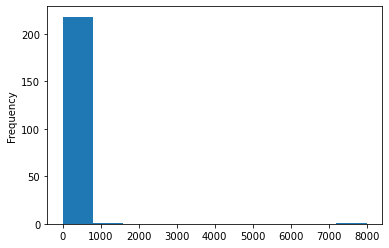

In [7]:
df['car_mileage'].plot(kind = 'hist')

Видим, что у 218 автомобилей car_mileage не достигает 1000 км и есть два объекта нетипичных для нашей выборки.

<AxesSubplot:ylabel='Frequency'>

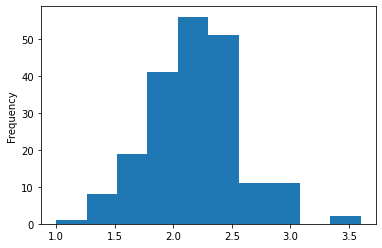

In [8]:
df['power'].plot(kind = 'hist')

Можем сделать вывод, что чаще всего встречаются в выборке автомобили с power 2.0-2.5
В данном показателе существуют ошибки и/или выбросы.

<AxesSubplot:ylabel='Frequency'>

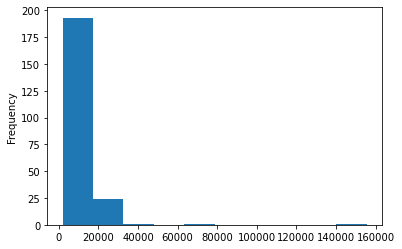

In [9]:
df['price'].plot(kind = 'hist')

Видим, что большее количество автомобилей имеют стоимость до 20000$, около 24 автомобилей имеют стоимость больше 20000$ и до 35000$, а так же есть 3 объекта, которые нетипичны. 

<AxesSubplot:ylabel='Frequency'>

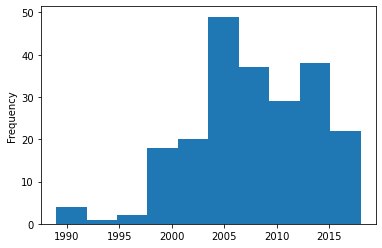

In [10]:
df['year'].plot(kind = 'hist')

Видим, что в выборке чаще всего встречаются автомобили 2004-2006 года выпуска.
Предположим, что в данном показателе существуют ошибки и/или выбросы.

# Statistics

In [11]:
df.describe()

,year,price,car_mileage,power
count,220.000000,220.000000,220.000000,200.000000
mean,2007.945455,11902.877273,283.945455,2.197450
std,5.870500,11995.810368,540.378513,0.396168
min,1989.000000,1880.000000,1.000000,1.000000
25%,2004.750000,6999.750000,170.000000,2.000000
50%,2008.000000,9699.500000,230.000000,2.200000
75%,2013.000000,14000.000000,314.250000,2.500000
max,2018.000000,155555.000000,8000.000000,3.600000


В поле power есть пропущенные значения. 
Типичный объект нашей выборки: автомобиль 2007 года выпуска, стоимостью 11900$, с пробегом примерно 283 км и мощностью 2.1.

# Mistakes

In [13]:
df = df.drop(df[df.price > 40000].index)
df.describe()

,year,price,car_mileage,power
count,217.000000,217.000000,217.000000,198.000000
mean,2007.834101,10830.829493,287.285714,2.190354
std,5.827786,5425.222107,543.346508,0.385365
min,1989.000000,1880.000000,1.000000,1.000000
25%,2004.000000,6999.000000,170.000000,2.000000
50%,2008.000000,9600.000000,230.000000,2.200000
75%,2013.000000,13999.000000,315.000000,2.500000
max,2018.000000,29400.000000,8000.000000,3.500000


Мы видим, что удалились 3 значения нетипичные для нашей выборки.

In [14]:
df.isnull().sum()

brand            0
model            0
year             0
body             0
price            0
car_mileage      0
fuel            19
power           19
transmission     0
dtype: int64

In [15]:
df.dtypes

brand            object
model            object
year              int64
body             object
price             int64
car_mileage       int64
fuel             object
power           float64
transmission     object
dtype: object

In [16]:
#!pip install sklearn

# Missing data

In [17]:
dfm = df

from sklearn.impute import SimpleImputer

power_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['power']] = power_mean.fit_transform(dfm[['power']]).round()

fuel_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['fuel']] = fuel_freq.fit_transform(dfm[['fuel']])


In [18]:
dfm.isnull().sum()

brand           0
model           0
year            0
body            0
price           0
car_mileage     0
fuel            0
power           0
transmission    0
dtype: int64

# Log

In [19]:
#!pip install seaborn

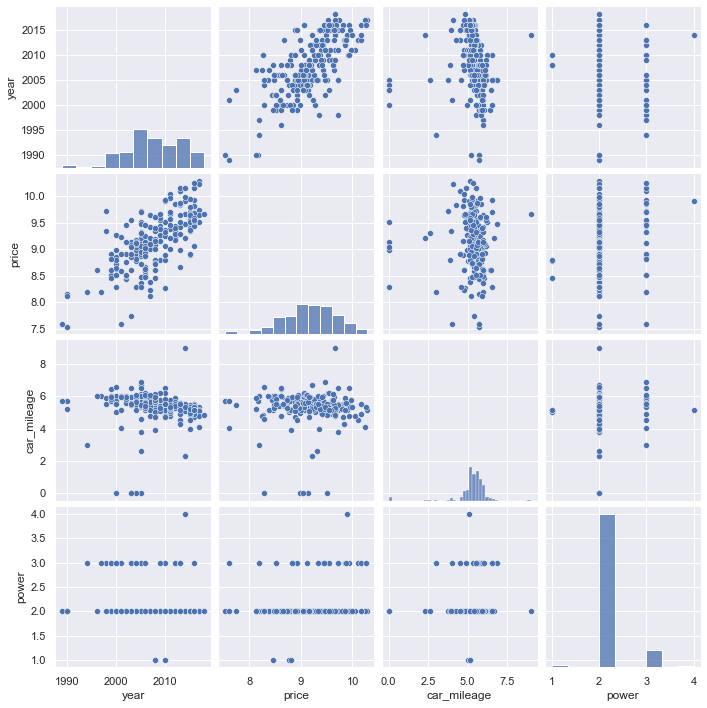

In [20]:
df[['car_mileage', 'price']] = np.log(df[['car_mileage', 'price']])

import seaborn as sns
sns.set()
sns.pairplot(df)

Стоимость автомобилей лучше описывается годом выпуска и пробегом, чем мощностью.

# Outliers

In [21]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [22]:
df = outliers(df)
df.describe()

,year,price,car_mileage,power
count,217.000000,217.000000,217.000000,217.000000
mean,2007.845175,9.163051,5.348765,2.093377
std,5.793428,0.522279,0.771058,0.334858
min,1990.350743,7.593644,2.212088,1.036748
25%,2004.000000,8.853523,5.135798,2.000000
50%,2008.000000,9.169518,5.438079,2.000000
75%,2013.000000,9.546741,5.752573,2.000000
max,2018.000000,10.288750,7.734639,3.152624


# Encoding

In [23]:
from sklearn import preprocessing
dfm = df
dfm['transmission'] = preprocessing.LabelEncoder().fit_transform(dfm['transmission'])
dfm.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006.0,other,8.584852,5.393628,diesel,2.0,2
1,renault,master,2017.0,other,9.740969,5.351858,diesel,2.0,2
2,opel,vivaro,2015.0,other,9.629051,5.056246,diesel,2.0,2
3,ford,transit,2000.0,other,8.516993,5.703782,diesel,2.0,2
4,mercedes-benz,sprinter,2010.0,other,9.937889,6.525030,diesel,3.0,1


In [24]:
from sklearn import preprocessing
dfm = df
dfm['fuel'] = preprocessing.LabelEncoder().fit_transform(dfm['fuel'])
dfm.head(5)

,brand,model,year,body,price,car_mileage,fuel,power,transmission
0,ford,transit,2006.0,other,8.584852,5.393628,0,2.0,2
1,renault,master,2017.0,other,9.740969,5.351858,0,2.0,2
2,opel,vivaro,2015.0,other,9.629051,5.056246,0,2.0,2
3,ford,transit,2000.0,other,8.516993,5.703782,0,2.0,2
4,mercedes-benz,sprinter,2010.0,other,9.937889,6.525030,0,3.0,1


In [25]:
df3 = dfm[['brand','model','body']]
info = []
for column in df3.columns:
        vals = {"col": column,
                "nunique": df3[column].nunique(),
                "unique": df3[column].unique(),
                "type": df3[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
1,model,54,"[transit, master, vivaro, sprinter, t4, 530, c...",object
0,brand,20,"[ford, renault, opel, mercedes-benz, volkswage...",object
2,body,1,[other],object


In [26]:
dfr = df.drop(['model','body'], axis='columns', inplace=False)
dfr.shape

(217, 7)

In [27]:
fm = {'ford':0, 'renault':1, 'opel':2, 'mercedes-benz':3, 'volkswagen':4, 'bmw':5, 'smart':6, 'fiat':7, 'mitsubishi':8, 'audi':9, 'dacia':10, 'toyota':11, 'ваз':12, 'nissan':13, 'citroen':14, 'mini':15, 'kia':16, 'peugeot':17, 'газ':18, 'hyundai':19}
dfr['brand'] = dfr['brand'].map(fm)
dfr

,brand,year,price,car_mileage,fuel,power,transmission
0,0,2006.0,8.584852,5.393628,0,2.0,2
1,1,2017.0,9.740969,5.351858,0,2.0,2
2,2,2015.0,9.629051,5.056246,0,2.0,2
3,0,2000.0,8.516993,5.703782,0,2.0,2
4,3,2010.0,9.937889,6.525030,0,3.0,1
...,...,...,...,...,...,...,...
215,0,2016.0,9.546741,5.135798,0,2.0,2
216,4,2010.0,9.332558,5.509388,0,2.0,2
217,3,2000.0,8.517193,5.521461,0,3.0,2
218,3,2001.0,8.922658,5.913503,0,2.0,1


# Correlations

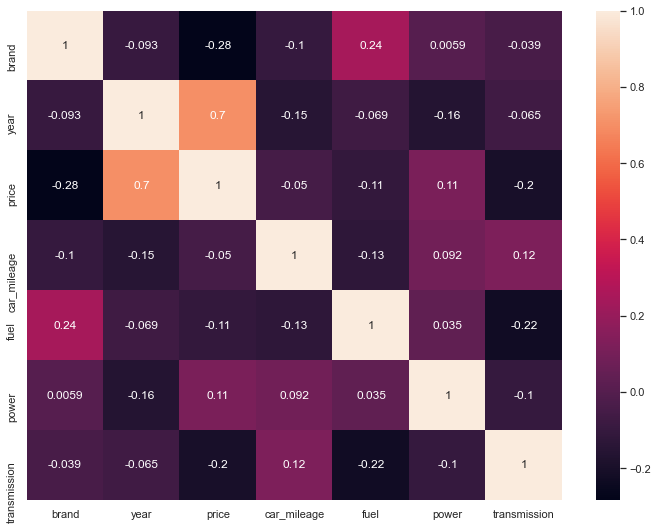

In [28]:
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Наибольшую корреляцию с ценой даёт год выпуска.

In [29]:
dfr.to_csv('auto1_prep.csv', sep=',', index=False)